**The Central Limit Theorem (CLT)**: The distribution of the average of a large number of random variables approaches a Gaussian.

Let $X_1, X_2, \ldots, X_n$ be independent and identically distributed random variables sampled from $\textit{any}$ (unknown) distribution with well-defined mean $\mu$ and variance $\sigma^2 \in (0, \infty)$. Then

$$\frac{\bar{X} - \mu}{\sigma/\sqrt{n}} \sim N(0,1)$$

as $n \to \infty$. The CLT implies that the asymptotic distribution of fluctuations of $\bar{X}$ around $\mu$ is a Gaussian, and the magnitude of the fluctuations scales as $\sim 1/\sqrt{n}$.

Here, we demonstrate the CLT numerically for a uniform distribution.

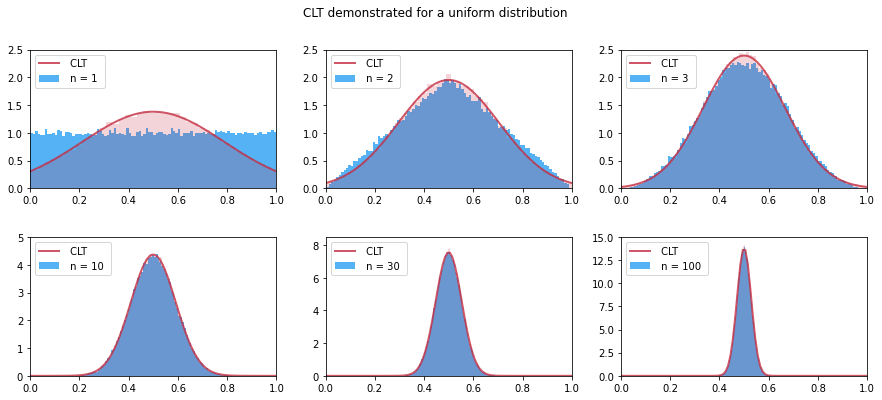

In [1]:
import numpy as np
import matplotlib.pyplot as plt

Gaussian = lambda x,mu,var: np.exp(-(x - mu)**2.0 / (2.0 * var))/np.sqrt(2.0*np.pi*var);
    
def RandomSampleUniform(n,umax=1,kmax=100000):
    f = [];
    for k in range(kmax): f.append(np.average(np.random.uniform(0,umax,n)));
    return f;


nlist = [1,2,3,10,30,100]; # number n of random variables. For the CLT need n >~ 30.
kmax = 100000; # number of drawings of the set (X_1, X_2, ..., X_n)
umax = 1; # uniform distribution from 0 to umax
varu = umax**2/12.0;
muu = umax/2.0;
xf = []; i = 1; nbins = 100; xrange=np.linspace(0, 1, num=nbins);

plt.figure(figsize=(15,6)); plt.subplots_adjust(hspace=0.35);
for n in nlist:
    xf = RandomSampleUniform(n,umax,kmax);
    nd = np.random.normal(muu,np.sqrt(varu/n),kmax);
    
    plt.subplot(2,3,i);
    i += 1;
    plt.xlim(0,umax);
    if (i <= 4): plt.ylim(0,2.5);
    elif (i == 5): plt.ylim(0,5.0);
    elif (i == 6): plt.ylim(0,8.5);
    else: plt.ylim(0,15.0);
    plt.plot(xrange,Gaussian(xrange, muu, varu/n),color='#c42d41',alpha=0.8,linewidth=2, label=" CLT ");
    plt.hist(xf, nbins, density=True, color='#42aaf4', alpha=0.9, label=" n = %d "%(n));
    plt.hist(nd, nbins, density=True, color='#c42d41', alpha=0.2);
    plt.legend(loc="upper left");

plt.suptitle('CLT demonstrated for a uniform distribution');
plt.show();
